# Marketing Analytics Exploratory
**Contexto**

Este notebook trata-se de uma tarefa desginada pelo CMO do Ifood, afim de obter insigths para futuras campanhas de marketing

Considere uma empresa bem estabelecida que opera no setor de varejo de alimentos. Atualmente eles têm
cerca de várias centenas de milhares de clientes registrados e atendem a quase um milhão
consumidores por ano. Eles vendem produtos de 5 categorias principais: vinhos, produtos de carne rara, produtos exóticos
frutas, peixes especialmente preparados e produtos doces. Estes podem ainda ser divididos em ouro e
produtos regulares. Os clientes podem encomendar e adquirir produtos através de 3 canais de venda: físico
lojas, catálogos e site da empresa. Globalmente, a empresa teve receitas sólidas e um
resultados nos últimos 3 anos, mas as perspectivas de crescimento do lucro para os próximos 3 anos não são
promissores... Por esta razão, várias iniciativas estratégicas estão sendo consideradas para inverter este
situação. Uma delas é melhorar o desempenho das atividades de marketing, com foco especial na
campanhas de marketing.

**Objetivo geral:**
Você é um analista de marketing e o Diretor de Marketing lhe disse que as recentes campanhas de marketing não foram tão eficazes quanto se esperava. Você precisa analisar o conjunto de dados para entender esse problema e propor soluções orientadas por dados.

**Os principais objetivos são:**
1. Explore os dados – não apenas plote médias e contagens. Fornecer insights, definir a causa e
efeito. Proporcionar uma melhor compreensão das características dos entrevistados;
2. Propor e descrever uma segmentação de clientes com base nos comportamentos dos clientes;
3. Criar um modelo preditivo que permita à empresa maximizar o lucro do próximo
Campanha de Marketing.

| Coluna  | Descrição |
| ------- | --------- |
| AcceptedCmp1   | 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário |
| AcceptedCmp2   |1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário |
| AcceptedCmp3   | 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário |
| AcceptedCmp4   | 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário |
| AcceptedCmp5   | 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário |
| Reponse   | 1 se o cliente aceitou a oferta na ultima campanha, 0 caso contrário|
| Complain  | 1 se o cliente reclamou nos últimos 2 anos|
| Customer_Days    | dias de inscrição do cliente na empresa|
| Education   | Nível de educação do cliente |
| MaritalStatus   | Estado civil do cliente|
| Kidhome  | número de crianças pequenas na casa do cliente |
| Teenhome   | número de adolescentes pequenos na casa do cliente |
| Income   | renda familiar anual do cliente |
| MntFishProducts   | valor gasto em produtos de pescado nos últimos 2 anos |
| MntMeatProducts   |valor gasto em produtos de carne nos últimos 2 anos |
| MntMeatFruits   |valor gasto em produtos de frutas nos últimos 2 anos |
| MntMeatSweetProducts   | valor gasto em produtos doces nos últimos 2 anos |
| MntWines   |valor gasto em vinhos nos últimos 2 anos |
| MntGoldProds   |valor gasto em produtos de ouro nos últimos 2 anos |
| NumDealsPurchases  | número de compras feitas com desconto |
| NumCatalogPurchases   | número de compras feitas usando o catálogo|
| NumStorePurchases   | número de compras feitas diretamente nas lojas |
| NumWebPurchases   | número de compras feitas pelo site da empresa |
| NumWebVisitsMounth   | número de visitas ao site da empresa no último mês|
| Recency  | número de dias desde a última compra |

# Explorando os dados
Vamos verificar se há dados nulos. Se há existência de dados que necessitem de transformação. Quais dados são mais relevantes no nosso dataset?

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib as mtp
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#carregando os dados
df = pd.read_csv('/content/ifood_df.csv')

In [ ]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MaritalStatus,ChildrenHome,Income2,Target,IdealCustomer
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,1529,1441,0,Graduation,Single,0,Above 50k,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,2272,21,15,0,Graduation,Single,1,below 50k,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2471,734,692,0,Graduation,Together,0,Above 50k,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,2298,48,43,0,Graduation,Together,1,below 50k,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,2320,407,392,0,PhD,Married,1,Above 50k,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,2540,1094,847,0,Graduation,Married,1,Above 50k,0,1
2201,64014.0,2,1,56,406,0,30,0,0,8,...,2178,436,428,1,PhD,Together,1,Above 50k,1,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,2314,1217,1193,1,Graduation,Divorced,0,Above 50k,1,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,2315,782,721,0,Master,Together,1,Above 50k,0,1


In [ ]:
#conhecendo nossas váriaveis
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Possuimos 39 váriaveis, sendo que 10 delas podem ser reduzidas a apenas duas váriaveis categóricas.

In [ ]:
#Eliminando excesso de variaveis, criando uma variavel categórica
df['Education'] = 0
for row in df:
  df.loc[df['education_2n Cycle'] == 1, 'Education'] = '2n_Cycle'
  df.loc[df['education_Basic'] == 1, 'Education'] = 'Basic'
  df.loc[df['education_Graduation'] == 1, 'Education'] = 'Graduation'
  df.loc[df['education_Master'] == 1, 'Education'] = 'Master'
  df.loc[df['education_PhD'] == 1, 'Education'] = 'PhD'

In [ ]:
df['MaritalStatus'] = 0
for row in df:
  df.loc[df['marital_Single'] == 1, 'MaritalStatus'] = 'Single'
  df.loc[df['marital_Together'] == 1, 'MaritalStatus'] = 'Together'
  df.loc[df['marital_Widow'] == 1, 'MaritalStatus'] = 'Widow'
  df.loc[df['marital_Divorced'] == 1, 'MaritalStatus'] = 'Divorced'
  df.loc[df['marital_Married'] == 1, 'MaritalStatus'] = 'Married'

In [ ]:
#eliminando colunas não relevantes
df.drop(columns=['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow', 'Z_CostContact','Z_Revenue',
                 'education_2n Cycle', 'education_Basic', 'education_Graduation','education_Master', 'education_PhD','education_Graduation'], inplace=True)

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Education',
       'MaritalStatus'],
      dtype='object')

Agora possuímos apenas 29 váriaveis, que considero que sejam as mais relevantes na nossaanálise exploratória.

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MaritalStatus
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,63,2822,1529,1441,0,Graduation,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,66,2272,21,15,0,Graduation,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,55,2471,734,692,0,Graduation,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,36,2298,48,43,0,Graduation,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,39,2320,407,392,0,PhD,Married


In [ ]:
df.dtypes

Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Customer_Days            int64
MntTotal                 int64
MntRegularProds          int64
AcceptedCmpOverall       int64
Education               object
MaritalStatus           object
dtype: object

In [ ]:
df.isnull().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Customer_Days          0
MntTotal               0
MntRegularProds        0
AcceptedCmpOverall     0
Education              0
MaritalStatus          0
dtype: int64

Agora que sabemos que não há dados ausentes e nem dados que necessitem de tratamento, realizarei a análise de distribuição das nossa váriaveis

Text(0.5, 1.0, 'Distribuição de Renda')

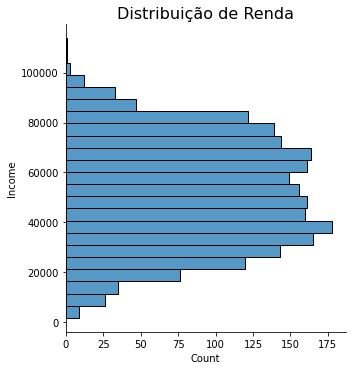

In [ ]:
#distribuição de renda
sns.displot(y='Income', data = df)
plt.title('Distribuição de Renda', size=16)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


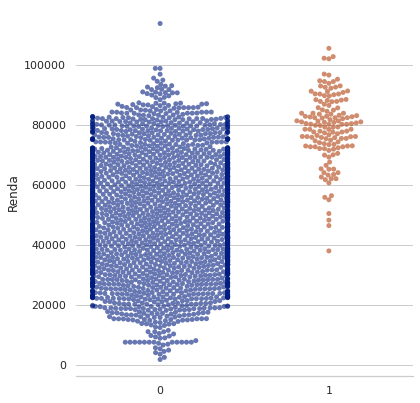

In [ ]:
sns.set_theme(style="whitegrid")

cmp1 = sns.catplot(
    data=df, kind="swarm",
    x="AcceptedCmp1", y="Income", hue="AcceptedCmp1",
    ci="sd", palette="dark", alpha=.6, height=6
)
cmp1.despine(left=True)
cmp1.set_axis_labels("", "Renda")

Nessa análise prévia do cruzamento dos clientes que aceitaram a oferta na 1°. campanha com renda, constatou-se que menos de 250 clientes aceitaram a oferta inicial, e destes a maior  parte possuem  renda anual acima dos 50000. Então a renda não se mostra o principal motivador.

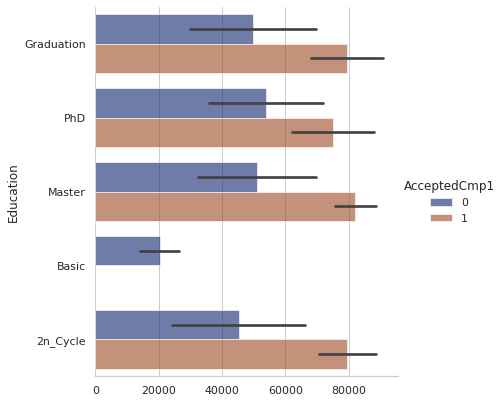

In [ ]:
sns.set_theme(style="whitegrid")

cmp1 = sns.catplot(
    data=df, kind="bar",
    x="Income", y="Education", hue="AcceptedCmp1",
    ci="sd", palette="dark", alpha=.6, height=6
)
cmp1.despine(left=True)
cmp1.set_axis_labels("", "Education")

Text(0.5, 1.0, 'Correlação de renda com numero de compras com desconto')

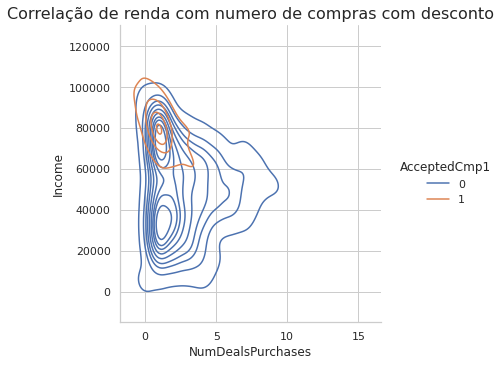

In [ ]:
sns.displot(y='Income',x='NumDealsPurchases', hue='AcceptedCmp1',kind='kde', data = df)
plt.title('Correlação de renda com numero de compras com desconto', size=16)

Nessa análise de correlação entre grau de instrução e renda e compras com desconto e renda, não é possivel determinar que a renda ou grau de instrução seja um dos fatores determinantes para nossa análise.

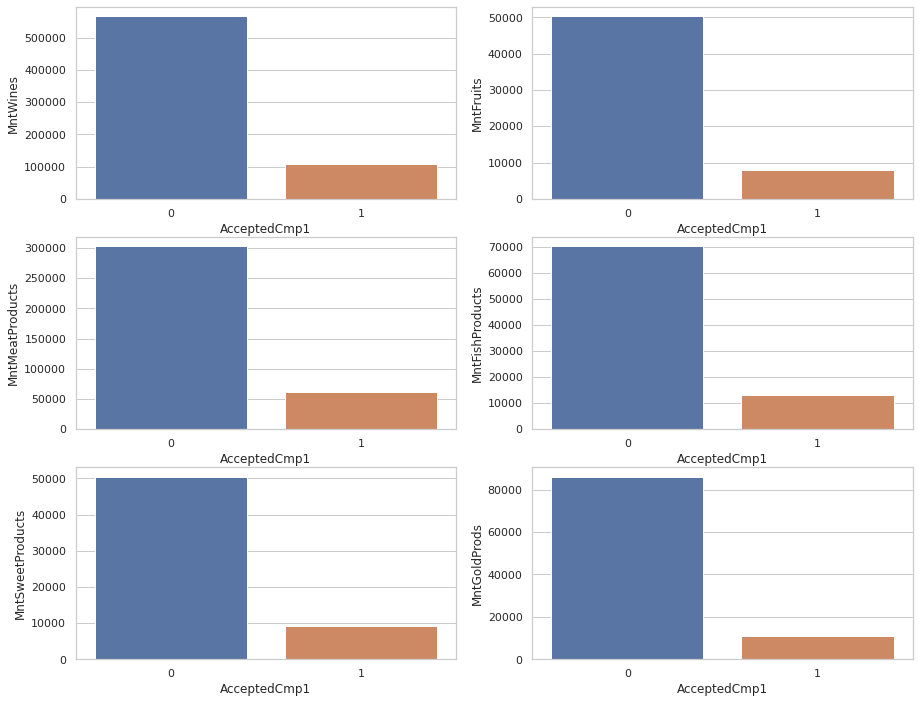

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(3, 2)


sns.barplot(ax = axes[0, 0], x='AcceptedCmp1', y='MntWines', data=df,estimator=sum, ci=None)
sns.barplot(ax = axes[0, 1], x='AcceptedCmp1', y='MntFruits', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[1, 0], x='AcceptedCmp1', y='MntMeatProducts', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[1, 1], x='AcceptedCmp1', y='MntFishProducts', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[2, 0], x='AcceptedCmp1', y='MntSweetProducts', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[2, 1], x='AcceptedCmp1', y='MntGoldProds', data=df,estimator=sum, ci = None)

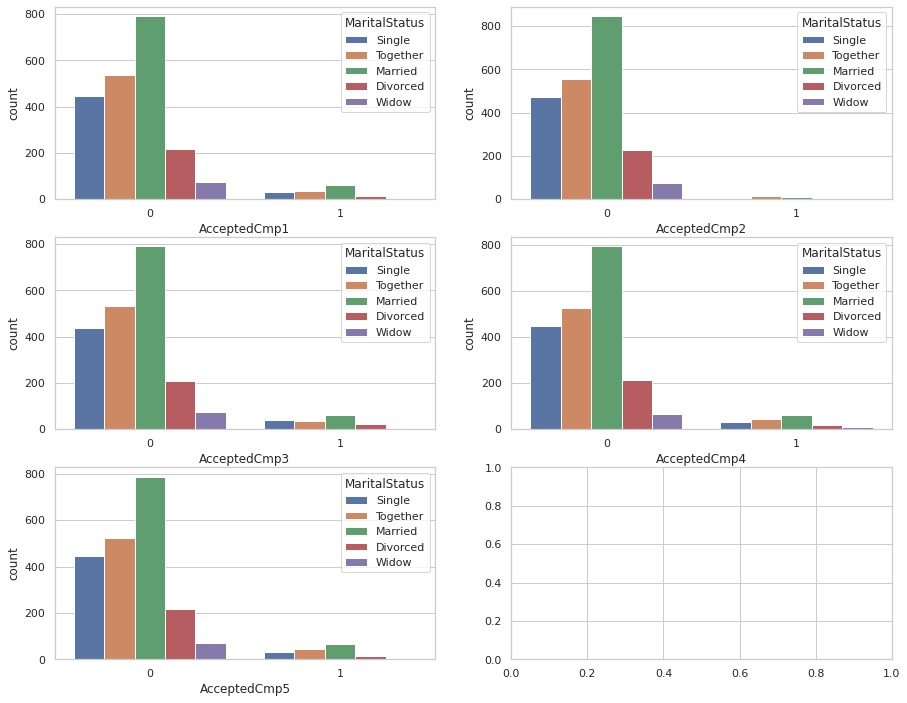

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(3, 2)

sns.countplot(ax = axes[0, 0], x="AcceptedCmp1", hue="MaritalStatus", data=df)
sns.countplot(ax = axes[0, 1], x="AcceptedCmp2", hue="MaritalStatus", data=df)
sns.countplot(ax = axes[1, 0], x="AcceptedCmp3", hue="MaritalStatus", data=df)
sns.countplot(ax = axes[1, 1], x="AcceptedCmp4", hue="MaritalStatus", data=df)
sns.countplot(ax = axes[2, 0], x="AcceptedCmp5", hue="MaritalStatus", data=df)

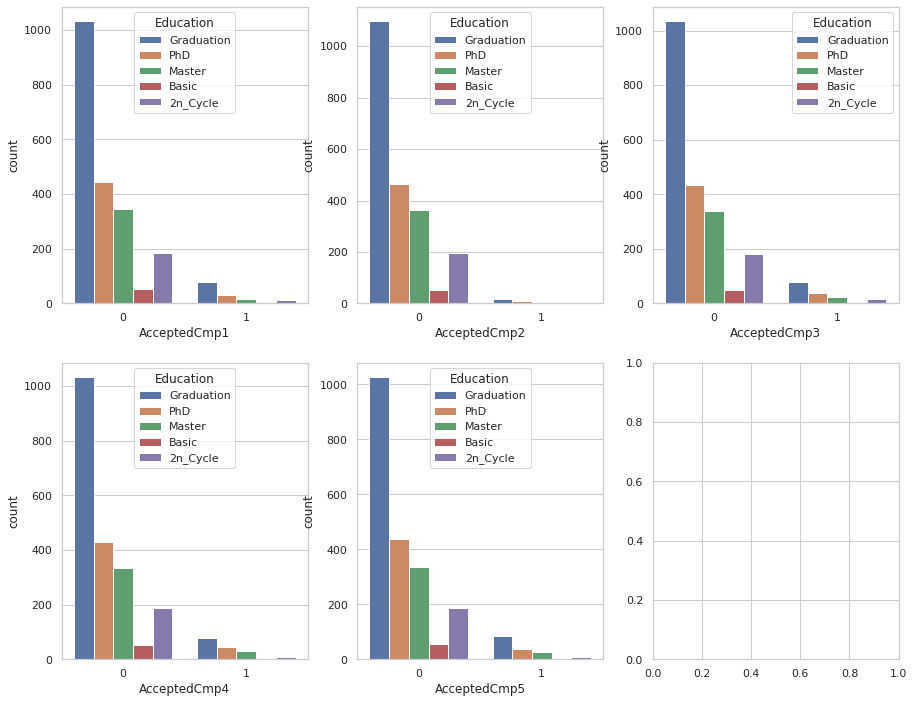

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(2, 3)

sns.countplot(ax = axes[0, 0], x="AcceptedCmp1", hue="Education", data=df)
sns.countplot(ax = axes[0, 1], x="AcceptedCmp2", hue="Education", data=df)
sns.countplot(ax = axes[0, 2], x="AcceptedCmp3", hue="Education", data=df)
sns.countplot(ax = axes[1, 0], x="AcceptedCmp4", hue="Education", data=df)
sns.countplot(ax = axes[1, 1], x="AcceptedCmp5", hue="Education", data=df)

Text(0.5, 1.0, 'Correlação de renda com numero de crianças em casa')

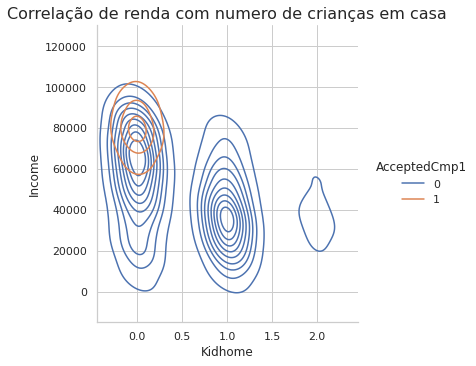

In [ ]:
sns.displot(y='Income',x='Kidhome', hue='AcceptedCmp1',kind='kde', data = df)
plt.title('Correlação de renda com numero de crianças em casa', size=16)

Text(0.5, 1.0, 'Correlação de renda com numero de filhos adolescentes')

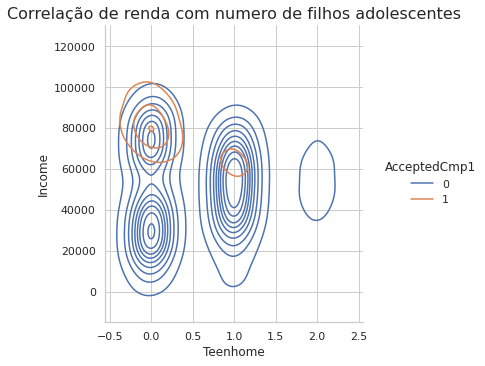

In [ ]:
sns.displot(y='Income',x='Teenhome', hue='AcceptedCmp1',kind='kde', data = df)
plt.title('Correlação de renda com numero de filhos adolescentes', size=16)

Iremos clusterizar os clientes que possuem filhos, afin de obter um padrão mais efetivo. Está se mostrando um padrão de aceite para clientes que não possuem filhos.

In [ ]:
df['ChildrenHome'] = 0
for row in df:
  df.loc[df['Kidhome'] >= 1, 'ChildrenHome'] = 1
  df.loc[df['Teenhome'] >= 1, 'ChildrenHome'] = 1
 

Text(0.5, 1.0, 'Correlação de renda com possui filhos')

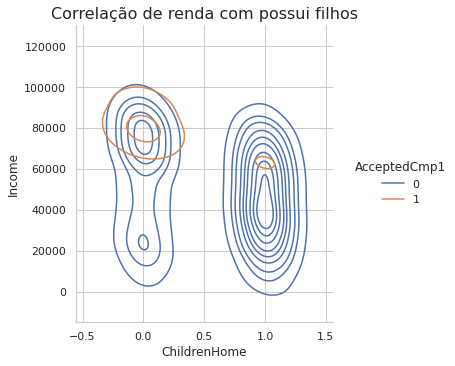

In [ ]:
sns.displot(y='Income',x='ChildrenHome', hue='AcceptedCmp1',kind='kde', data = df)
plt.title('Correlação de renda com possui filhos', size=16)

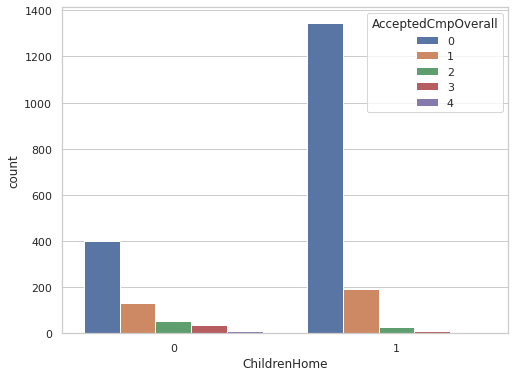

In [ ]:
sns.countplot(x="ChildrenHome", hue="AcceptedCmpOverall", data=df)

Identificamos um padrão de aceitação de clientes que possuem renda acima de 50k anuais. Dessa forma, vamos clusterizar em Income2 em categórico.

In [ ]:
df['Income2'] = 'below 50k'
for row in df:
  df.loc[df['Income'] > 49999.99 , 'Income2'] = 'Above 50k'

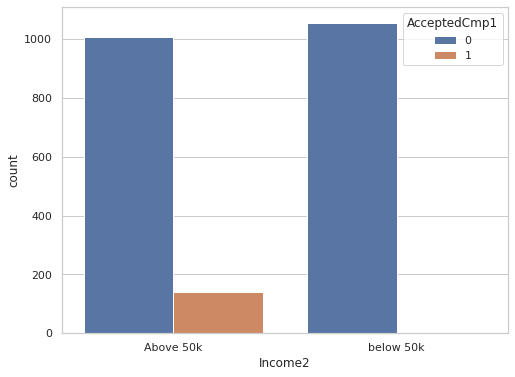

In [ ]:
sns.countplot(x="Income2", hue="AcceptedCmp1", data=df)

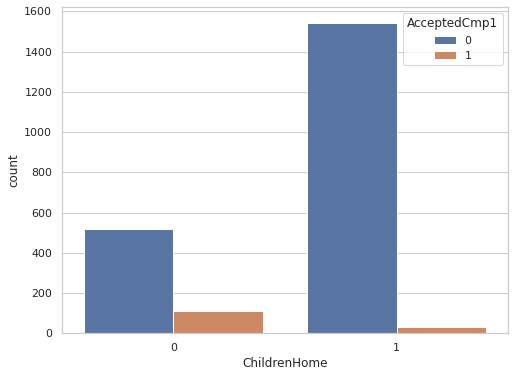

In [ ]:
sns.countplot(x="ChildrenHome", hue="AcceptedCmp1", data=df)

In [ ]:
df.groupby('Income2')['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Income2,,,,,
Above 50k,139,26,74,147,161
below 50k,3,4,89,17,0


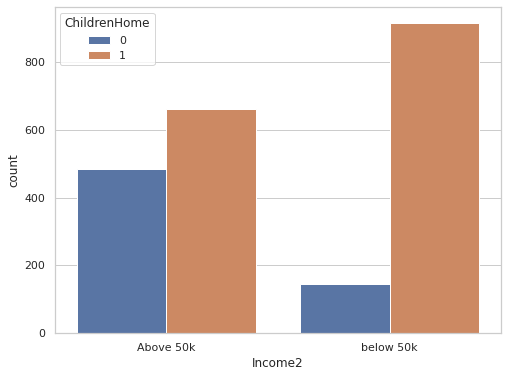

In [ ]:
sns.countplot(x="Income2", hue='ChildrenHome', data=df)

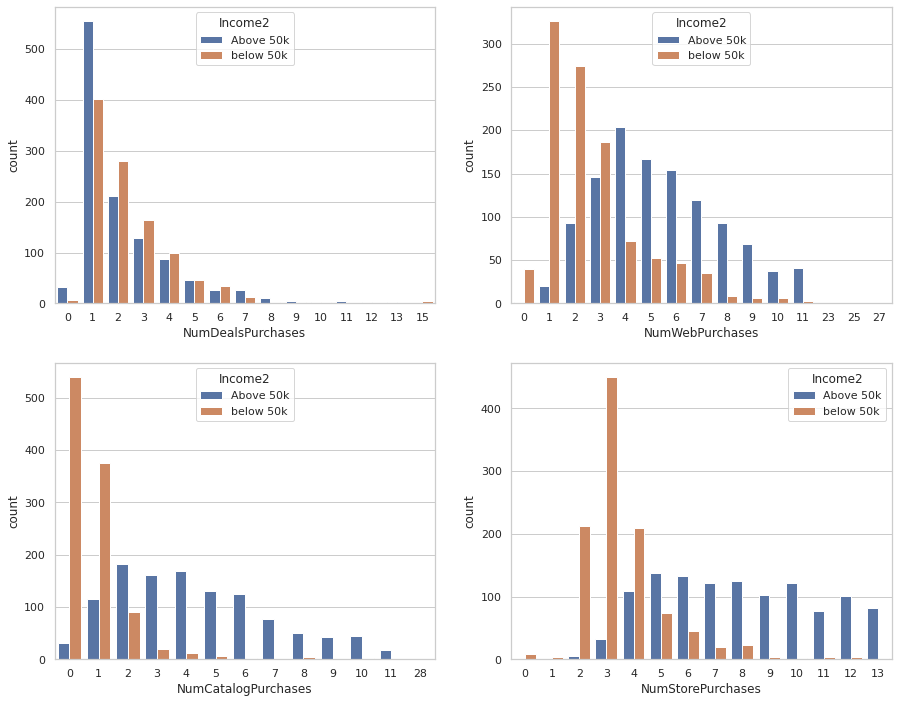

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x="NumDealsPurchases", hue="Income2", data=df)
sns.countplot(ax = axes[0, 1], x="NumWebPurchases", hue="Income2", data=df)
sns.countplot(ax = axes[1, 0], x="NumCatalogPurchases", hue="Income2", data=df)
sns.countplot(ax = axes[1, 1], x="NumStorePurchases", hue="Income2", data=df)

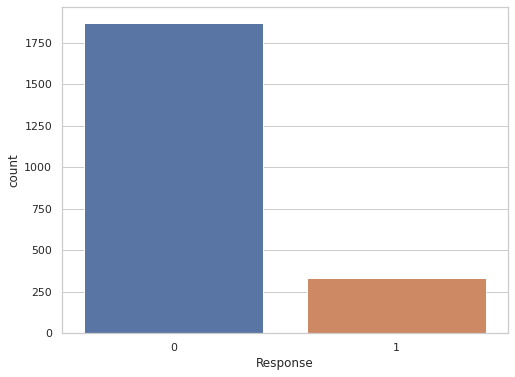

In [ ]:
plt.rc('figure', figsize=(8, 6))
sns.countplot(x='Response', data=df)

Para conseguirmos obter um rastreamento do padrão de comportamento dos nossos clientes, iremos separa-los entre os clientes que aceitaram alguma oferta e os que não aceitaram, atribruindo 1 para os que aceitaram alguma oferta e 0 caso contrário.

In [ ]:
df['Target'] = 0
for row in df:
  df.loc[(df['AcceptedCmp1'] == 1) | (df['AcceptedCmp2'] == 1) |
         (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp4'] == 1) |
         (df['AcceptedCmp4'] == 1) | (df['AcceptedCmp5'] == 1) ,'Target'] = 1
   

In [ ]:
#conferindo o total de clientes
df['Target'].sum()

458

In [ ]:
costumertarget = df['Target'].sum()
totalcostumer = 2205

In [ ]:
percent_customer = (costumertarget/totalcostumer)*100

In [ ]:
print(f'O percentual de clientes que aceitaram alguma campanha é de {percent_customer}%')

O percentual de clientes que aceitaram alguma campanha é de 20.77097505668934%


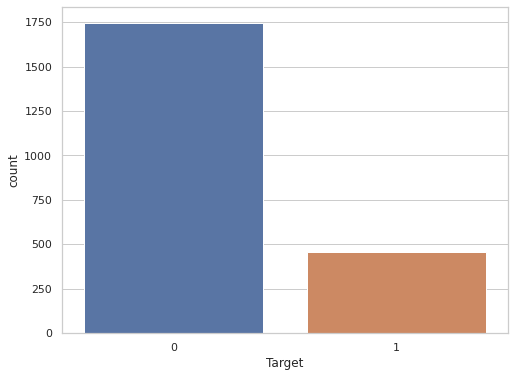

In [ ]:
sns.countplot(x='Target', data=df)

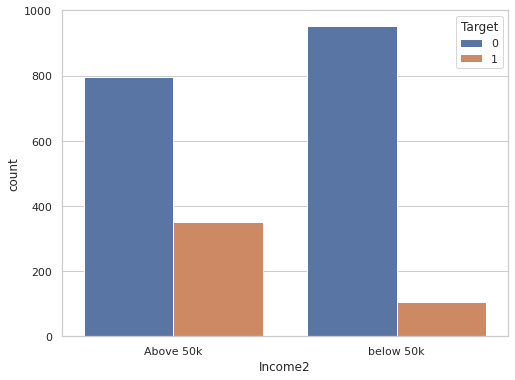

In [ ]:
sns.countplot(x="Income2", hue='Target', data=df)

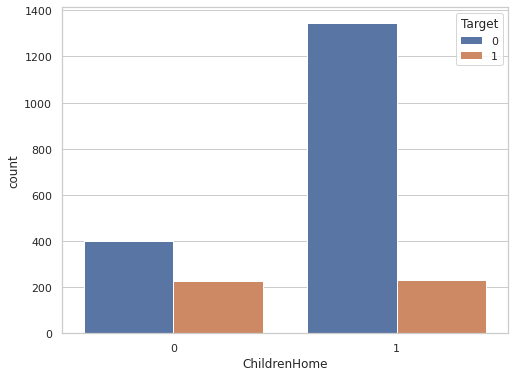

In [ ]:
sns.countplot(x="ChildrenHome", hue='Target', data=df)

Os dados mostram que as campanhas de marketing não estão sendo efetivas, pois somente 20% da nossa base aceitou alguma das ofertas. Desta forma se mostra idel olhar para os clientes que não aceitaram a campanha, os Target 0, afim de identificar o padrão de consumo.

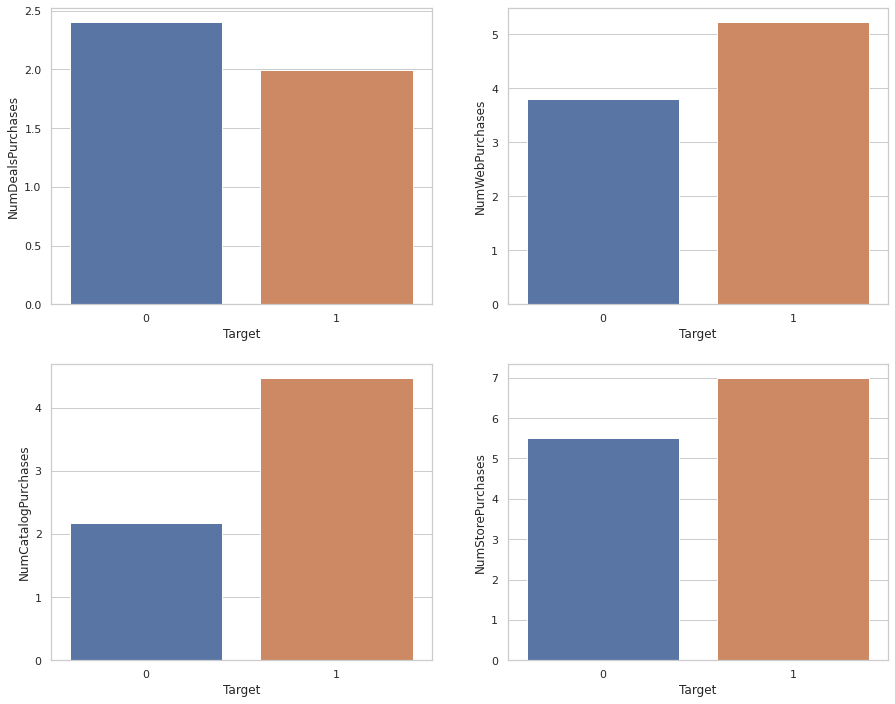

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(2, 2)

sns.barplot(ax = axes[0, 0], y="NumDealsPurchases", x="Target", data=df,ci=None)
sns.barplot(ax = axes[0, 1], y="NumWebPurchases", x="Target", data=df, ci=None)
sns.barplot(ax = axes[1, 0], y="NumCatalogPurchases", x="Target", data=df, ci=None)
sns.barplot(ax = axes[1, 1], y="NumStorePurchases", x="Target", data=df, ci=None)

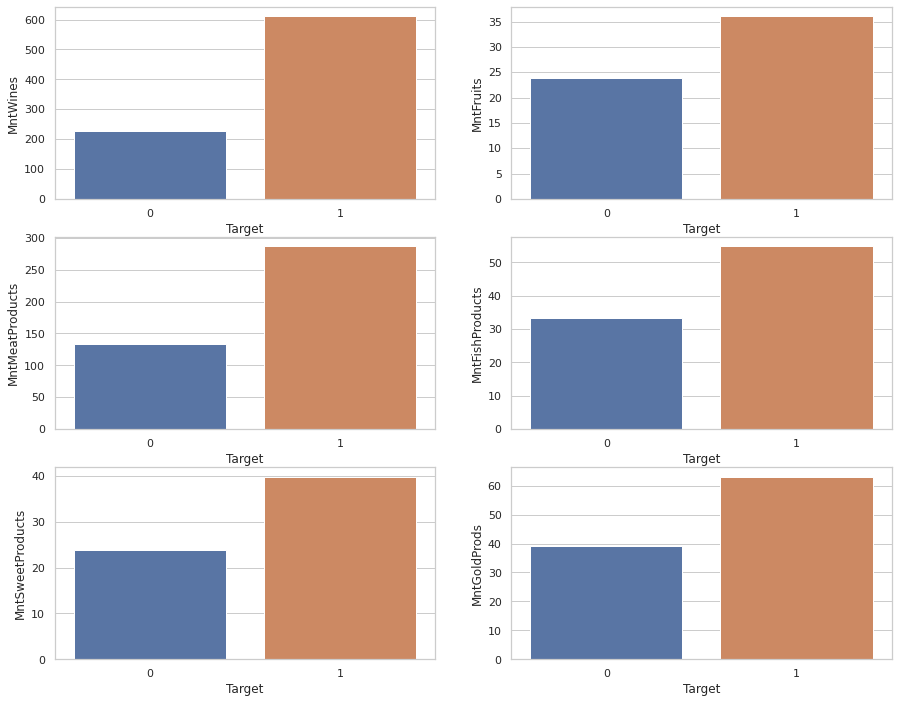

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(3, 2)


sns.barplot(ax = axes[0, 0], x='Target', y='MntWines', data=df, ci=None)
sns.barplot(ax = axes[0, 1], x='Target', y='MntFruits', data=df,ci=None)
sns.barplot(ax = axes[1, 0], x='Target', y='MntMeatProducts', data=df,ci=None)
sns.barplot(ax = axes[1, 1], x='Target', y='MntFishProducts', data=df,ci=None)
sns.barplot(ax = axes[2, 0], x='Target', y='MntSweetProducts', data=df,ci=None)
sns.barplot(ax = axes[2, 1], x='Target', y='MntGoldProds', data=df, ci = None)

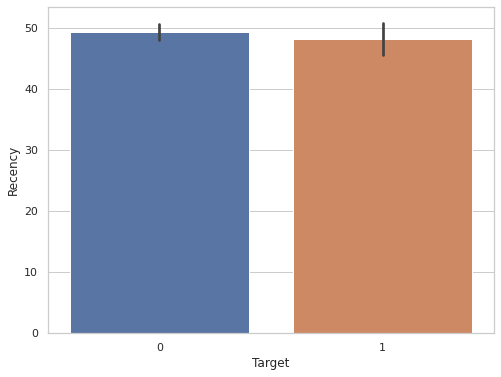

In [ ]:
plt.rc('figure', figsize=(8, 6))
sns.barplot(x='Target', y="Recency", data=df)

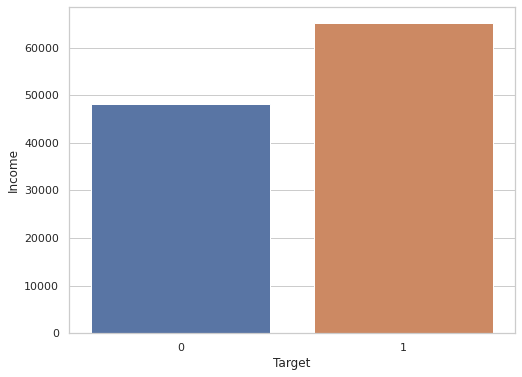

In [ ]:
sns.barplot(y="Income", x="Target", data=df,ci=None)

Aqui vamos seguimentar os clientes em variavel dummies com nome de CustomerIdeal, com base na renda, e consumo de produtos.

In [ ]:
df['IdealCustomer'] = 0
for row in df:
  df.loc[(df['Income2'] == 'Above 50k') & (df['MntWines'] > 200) &
         (df['MntFruits'] > 10) & (df['MntMeatProducts'] > 100) &
         (df['MntFishProducts'] > 20) & (df['MntSweetProducts'] > 10) &
         (df['MntGoldProds'] > 20), 'IdealCustomer'] = 1

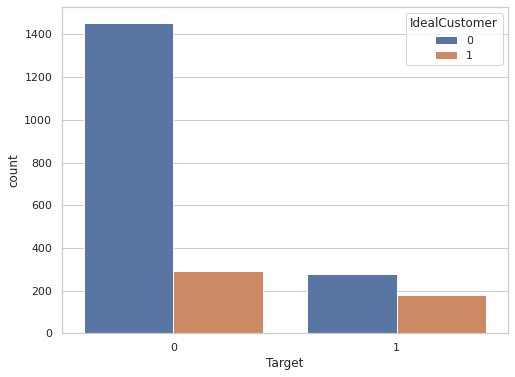

In [ ]:
sns.countplot(x="Target", hue="IdealCustomer", data=df)

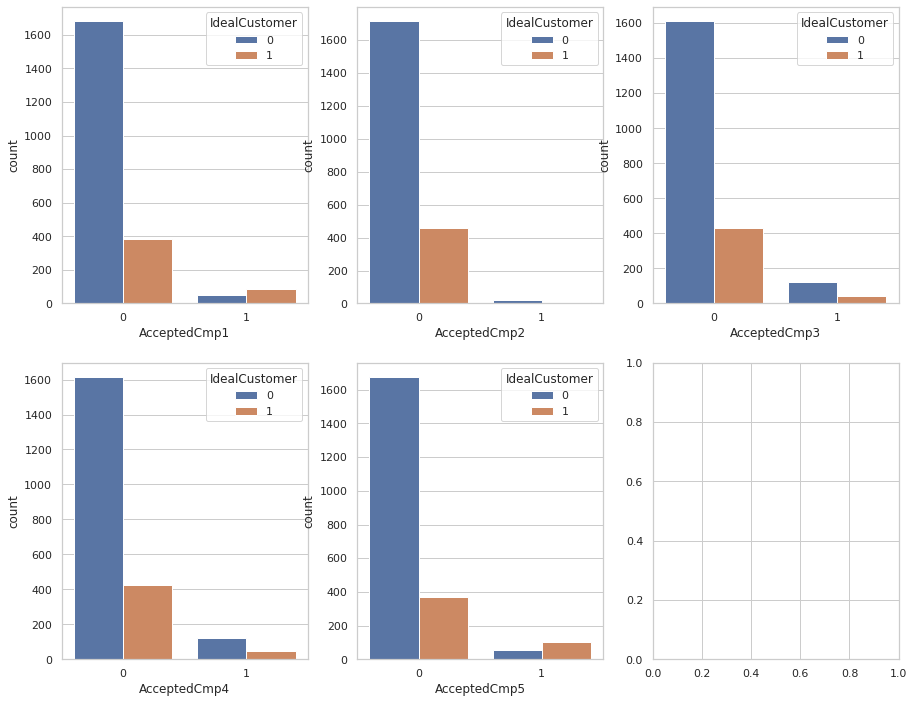

In [ ]:
#Verificando se a seguimentação é efetiva para o aceite das campanhas
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(2, 3)

sns.countplot(ax = axes[0, 0], x="AcceptedCmp1", hue="IdealCustomer", data=df)
sns.countplot(ax = axes[0, 1], x="AcceptedCmp2", hue="IdealCustomer", data=df)
sns.countplot(ax = axes[0, 2], x="AcceptedCmp3", hue="IdealCustomer", data=df)
sns.countplot(ax = axes[1, 0], x="AcceptedCmp4", hue="IdealCustomer", data=df)
sns.countplot(ax = axes[1, 1], x="AcceptedCmp5", hue="IdealCustomer", data=df)

Vamos criar uma arvore de decisão com a variavel target.

In [ ]:
y = df.Target

In [ ]:
X = df.drop('Target',axis=1)

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [ ]:
clf = clf.fit(X[['ChildrenHome']], y)
clf

DecisionTreeClassifier(random_state=100)

In [ ]:
df.Target.value_counts()

0    1747
1     458
Name: Target, dtype: int64

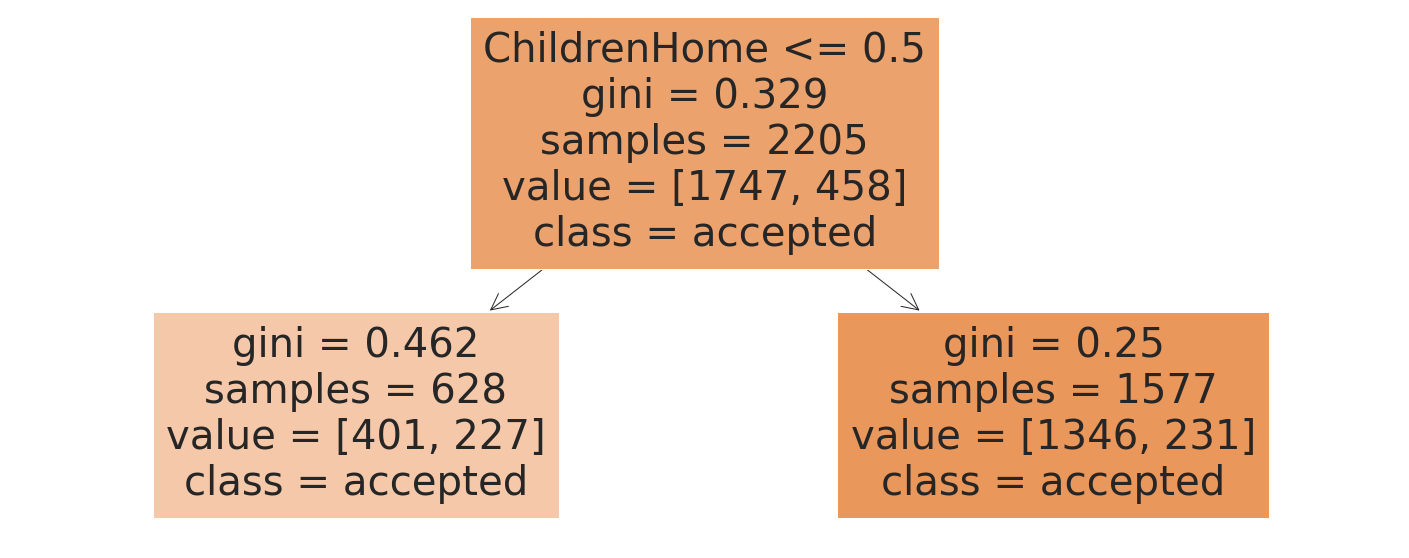

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['accepted', 'not_accepted'],
          feature_names=['ChildrenHome']);